# Intervalos

Como vimos en el notebook anterior, trabajaremos con intervalos.

Recordemos que un *intervalo* $[a,b] \subseteq \mathbb{R^*}$ es el conjunto 

$$[a, b] := \{x \in \mathbb{R}^* : a \le x \le b \}$$.

## Intervalos en Julia

[1] (i) Define un tipo compósito de Julia `Intervalo` para representar un intervalo de dos números reales, que incluya redondeo dirigido. Por el momento supongamos que todos los elementos serán de tipo `BigFloat`.

Para ello, deberás definir constructores que acepten cadenas y/o números.

(ii) Implementa las operaciones básicas sobre intervalos.

(iii) Limpia tu código para reducir la repetición de código, al sacar cada vez código en común a una función por separado.

[2] Haz un *módulo* de Julia llamado `Intervalos` en un archivo `intervalos.jl`, que contiene todas las definiciones anteriores. 

[3] (i) Escribe *tests* ("pruebas") usando [`FactCheck.jl`](https://github.com/JuliaLang/FactCheck.jl).

Estos tests se deberán correr cada vez que modifiques tu código, ¡para verificar que no lo hayas estropeado entre tanto!

(ii) ¡Intenta destruir el código de alguien más! O sea, escribe tests que realmente prueben el código del otro.

## Problema #1

In [136]:
workspace()

In [137]:

using Intervals; #Utilizo my modulo de intervalos
using FactCheck;
using PyPlot;

    close(Union(Symbol,Figure,Integer,String),) at /home/estudiante/.julia/v0.3/PyPlot/src/PyPlot.jl:376
is ambiguous with: 
    close(Union(Symbol,Figure,Integer,String),) at /home/estudiante/.julia/v0.3/PyPlot/src/PyPlot.jl:376.
To fix, define 
    close(Union(Symbol,Integer,String),)
before the new definition.
    close(Union(Symbol,Figure,Integer,String),) at /home/estudiante/.julia/v0.3/PyPlot/src/PyPlot.jl:376
is ambiguous with: 
    close(Union(Symbol,Figure,Integer,String),) at /home/estudiante/.julia/v0.3/PyPlot/src/PyPlot.jl:376.
To fix, define 
    close(Union(Symbol,Integer,String),)
before the new definition.
    close(Union(Symbol,Figure,Integer,String),) at /home/estudiante/.julia/v0.3/PyPlot/src/PyPlot.jl:376
is ambiguous with: 
    close(Union(Symbol,Figure,Integer,String),) at /home/estudiante/.julia/v0.3/PyPlot/src/PyPlot.jl:376.
To fix, define 
    close(Union(Symbol,Integer,String),)
before the new definition.
    close(Union(Symbol,Figure,Integer,String),) at /hom

true

StackOverflowError: stack overflow

In [122]:
Interval(-1.1,-2.1)

Interval(-2.1,-1.1)

In [121]:
facts("Pruebas Básicas") do
    A = Interval(1,2)
    B = Interval(3,4)
    C = Interval(4.0,6.0)
    D = Interval(-1,1)
    
    @fact A + B => C
    @fact A - B => Interval(-2.0,-2.0)
    @fact A*B => Interval(3,8)
    @fact A/B => Interval(.25,0.6666666666666667)
    @fact midpoint(C) => 5
    @fact contains(B, 1.0) => false
    @fact contains(B, midpoint(B)) => true
    @fact D^2 => Interval(0,1)
    @fact D^3 => Interval(-1,1)
    @fact A+2.0 => Interval(3,4)
    @fact 2.0B => Interval(6,8)
    @fact contains(Interval(0.1,.1),0.1) => true
    @fact Interval(2,1) => Interval(1,2)
end


Pruebas Básicas
13 facts verified.


delayed_handler (generic function with 4 methods)

## Operaciones con intervalos 

El propósito de trabajar con intervalos es, por supuesto, el poder *usarlos* para llevar a cabo cálculos.

[4] Utiliza tu código para rehacer el cálculo de $\pi$ del notebook 5. Ahora, ¡deberá ser mucho más fácil! 

¿Cuál es la diferencia entre el cálculo mediante intervalos y el cálculo original que hicimos?

In [3]:
function SumToPi(n)
    
    finito = Interval(0,0)
    
    for i = 1:n
        finito += Interval(1,1)/Interval(i^2,i^2)
    end
    
    finito += Interval(1,1)/Interval(n,n+1) 
end
        
         
SumToPi(10) 
    

Interval(1.6406768220756305,1.649767731166541)

In [14]:
UpPi = Float64[]
DownPi = Float64[]
Pi=Float64[]
n = [i for i in 20:150]

for i in 20:150
    push!(UpPi,sqrt(6*SumToPi(i).b))
    push!(DownPi,sqrt(6*SumToPi(i).a))
    push!(Pi,pi)
end


length(n)

131

In [220]:
n

31-element Array{Int64,1}:
 20
 21
 22
 23
 24
 25
 26
 27
 28
 29
 30
 31
 32
  ⋮
 39
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50

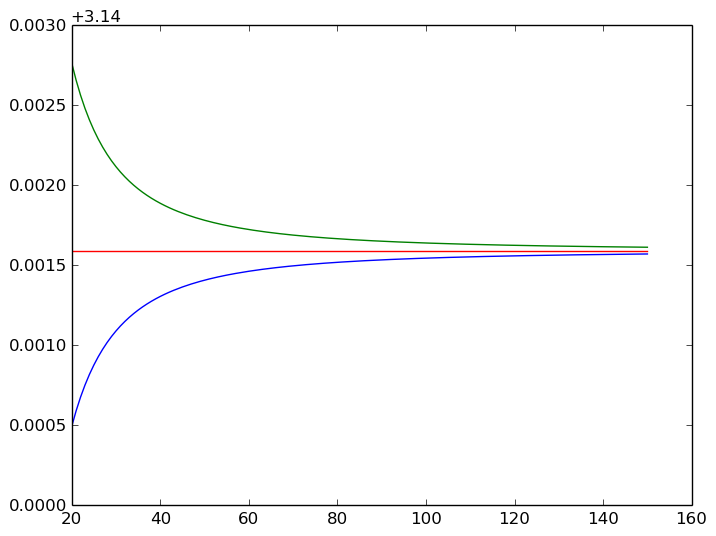

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f6cb360a350>
 PyObject <matplotlib.lines.Line2D object at 0x7f6cb360a5d0>
 PyObject <matplotlib.lines.Line2D object at 0x7f6cb360ac90>

In [15]:
plot(n,DownPi,n,UpPi,n,Pi)

In [17]:
isodd(3)

true

Sin embargo, hay sutilezas con las operaciones con intervalos:

[5] (i) Define la potencia para intervalos.

(ii) Para el intervalo $X = [-1,1]$, calcula $X \cdot X$ y $X^2$ (donde $\cdot$ denota la multiplicación de intervalos). ¿Qué observas? 

In [74]:
X = Interval(-1,1)


Interval(-1.0,1.0)

In [58]:
X*X

Interval(-1.0,1.0)

In [60]:
X^2

Interval(0.0,1.0)

Se vé claramente la diferencia. $X^2$ contiene el cuadrado de todos los números en $X$ mientras que $X*X$ contiene los productos. El primer intervalo necesariamente es estrictamente positivo mientras que el segundo es de hecho igual a $X$

(iii) Calcula $[-1,1] \cdot \left([-1,0] + [3,4]\right)$ y $[-1,1]\cdot [-1,0] + [-1,1] \cdot [3,4]$. ¿Qué observas?

In [62]:
Interval(-1,1)*(Interval(-1,0)+Interval(3,4))

Interval(-4.0,4.0)

In [64]:
Interval(-1,1)*Interval(-1,0)+Interval(-1,1)*Interval(3,4)


Interval(-5.0,5.0)

Claramente, la multiplicación de intervalos no es asociativa!

In [138]:
function p1(x)
    
    return((x-1.0)*(x-2.0))
    
end
X1=Interval(-1,1)
X2=Interval(1,3)
X3=Interval(3,5)

p1(X1)

Interval(-0.0,6.0)

In [139]:
y1=[p1(i) for i in X1.a:+.1:X1.b]
x1=[i for i in X1.a:+.1:X1.b]

y2=[p1(i) for i in X2.a:+.1:X2.b]
x2=[i for i in X2.a:+.1:X2.b]

y3=[p1(i) for i in X3.a:+.1:X3.b]
x3=[i for i in X3.a:+.1:X3.b]

plot(x1,y1)

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f56ac4fa690>

[6] Con las operaciones definidas en Julia, podemos insertar intervalos en cálculos sencillos.

(i) Define una función polinomial $p_1(x) := (x-1)(x-2)$. 

(ii) ¿Cómo se puede mandar a $p_1$ un intervalo como argumento?

(iii) ¿Qué representa el resultado?

(iv) Juega con distintos intervalos como entrada y dibuja los resultados.

(v) Haz lo mismo para $p_2(x) := x^2 -2$.

(vi) Pensando en estos ejemplos de polinomios, ¿para qué nos podrán servir los intervalos?

[7] Haz una implementación de tu idea de la pregunta [6].